<a href="https://colab.research.google.com/github/DharmeshRV/Health-Insurance-Cross-Sell-Prediction/blob/main/Health_Insurance_Cross_Sell_Predictiond0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - **Health Insurance Cross Sell Prediction**



##### **Project Type**    - Classification
##### **Contribution**    - Individual
##### **Name**           - Dharmesh Kumar

# **Project Summary -**

Our client is an Insurance company which has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders from the past year will also be interested in Vehicle Insurance provided by the company. An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness or death in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee.

Just like medical insurance, there is vehicle insurance where every year customer needs to pay a premium of certain amount to insurance provider company so that in case of any unfortunate accident by the vehicle, the insurance provider company will provide a compensation to the customer.

**1. Data Wrangling**
* Getting the data
* Understanding the variables
* Treating the missing values and outliers

**2. Exploratory Data Analysis**
* Checking the distribution of response variable
* Checking the distribution of independent variables
* Checking feature-wise responses
* Checking correlation among variables


**3. Data Pre-processing**
* Encoding the Categorical Variables
* Data splitting and handling class imbalance

**4. Classification Algorithms and Implementation :**

1. Logistic regression

2. Random Forest Classifier

3. AdaBoost Classifier

# **GitHub Link -**

https://github.com/DharmeshRV/Health-Insurance-Cross-Sell-Prediction

# **Problem Statement**


**Building a model to predict whether a customer would be interested in vehicle insurance is extremely helpful for the company because it can accordingly plan its communication strategy to reach out to those customers and optimize its business model and revenue. In order to predict whether the customer will be interested in vehicle insurance you have information about demographics(gender, age, region code), vehicles and policy etc.**

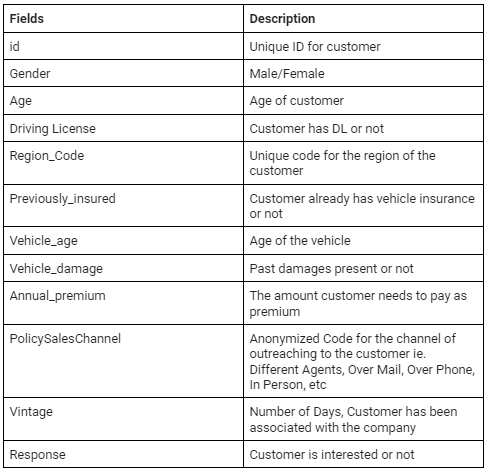

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report

import warnings
warnings.filterwarnings("ignore")


### Dataset Loading

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load Dataset
dataset=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Almabetter_Data Science/Capstone Projects/Health Insurance Cross Sell Prediction - Dharmesh Kumar/TRAIN-HEALTH INSURANCE CROSS SELL PREDICTION.csv')

### Dataset First View

In [4]:
# Dataset First Look
dataset.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


### Dataset Rows & Columns count

In [5]:

# Dataset Rows & Columns count
dataset.shape

(381109, 12)

### Dataset Information

In [6]:
# Dataset Info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


#### Duplicate Values

In [7]:
# Dataset Duplicate Value Count (True shows duplicate row)
dataset.duplicated().value_counts()

False    381109
dtype: int64

There are no duplicated rows in the dataset.

#### Missing Values/Null Values

In [8]:
# Missing Values/Null Values Count
dataset.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

Great! no null values as well.

### What did you know about your dataset?

The dataset contains the information of the customers holding Health Insurance policy of an Insurance company. Now they need to build a model to predict whether the policyholders from the past year will also be interested in Vehicle Insurance provided by the company. With the help of this model  the company can communicate efficiently to interested customers.

The dataset has 381109 rows and 12 columns. There are no missing values and duplicate values in the dataset.

## ***2. Understanding Your Variables***

In [9]:
# Dataset Columns
dataset.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [10]:
# Dataset Describe
dataset.describe(include='all')

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109,381109.000000,381109.000000,381109.000000,381109.000000,381109,381109,381109.000000,381109.000000,381109.000000,381109.000000
unique,NaN,2,NaN,NaN,NaN,NaN,3,2,NaN,NaN,NaN,NaN
top,NaN,Male,NaN,NaN,NaN,NaN,1-2 Year,Yes,NaN,NaN,NaN,NaN
freq,NaN,206089,NaN,NaN,NaN,NaN,200316,192413,NaN,NaN,NaN,NaN
mean,190555.000000,NaN,38.822584,0.997869,26.388807,0.458210,NaN,NaN,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,NaN,15.511611,0.046110,13.229888,0.498251,NaN,NaN,17213.155057,54.203995,83.671304,0.327936
min,1.000000,NaN,20.000000,0.000000,0.000000,0.000000,NaN,NaN,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,NaN,25.000000,1.000000,15.000000,0.000000,NaN,NaN,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,NaN,36.000000,1.000000,28.000000,0.000000,NaN,NaN,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,NaN,49.000000,1.000000,35.000000,1.000000,NaN,NaN,39400.000000,152.000000,227.000000,0.000000


### Variables Description 

### Check Unique Values for each variable.

In [11]:
# Check Unique Values for each variable.
columnz = dataset.columns.to_list()
for i in columnz:
  print('The number of Unique Values in', i, 'are:', dataset[i].nunique())

The number of Unique Values in id are: 381109
The number of Unique Values in Gender are: 2
The number of Unique Values in Age are: 66
The number of Unique Values in Driving_License are: 2
The number of Unique Values in Region_Code are: 53
The number of Unique Values in Previously_Insured are: 2
The number of Unique Values in Vehicle_Age are: 3
The number of Unique Values in Vehicle_Damage are: 2
The number of Unique Values in Annual_Premium are: 48838
The number of Unique Values in Policy_Sales_Channel are: 155
The number of Unique Values in Vintage are: 290
The number of Unique Values in Response are: 2


In [12]:
#creating list of numerical and categorical columns
num_columns=[]
for col in columnz:
  if dataset[col].nunique()>3:
    num_columns.append(col)
categorical_columns=list(set(columnz)-set(num_columns))

In [13]:
#Check Unique Values in categorical variables

for i  in categorical_columns:
  print('The Unique Values in', i, 'are:', dataset[i].unique())

The Unique Values in Vehicle_Age are: ['> 2 Years' '1-2 Year' '< 1 Year']
The Unique Values in Previously_Insured are: [0 1]
The Unique Values in Gender are: ['Male' 'Female']
The Unique Values in Response are: [1 0]
The Unique Values in Driving_License are: [1 0]
The Unique Values in Vehicle_Damage are: ['Yes' 'No']


## ***3. Data Wrangling***

### Data Wrangling Code

In [14]:
# Write your code to make your dataset analysis ready.

# The 'id' column is not relevant in the modeling so we drop it
dataset.drop(columns=['id'],inplace=True)
num_columns.remove('id')

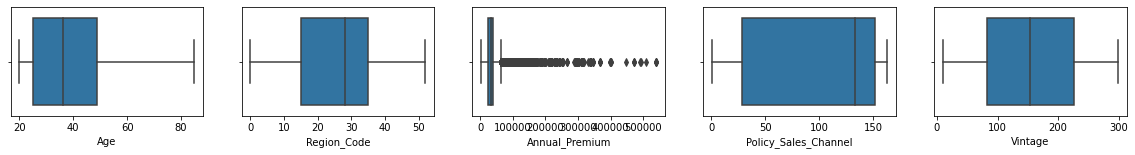

In [15]:
# box plot for each numerical column to check the outliers
plt.figure(figsize=(20, 2))
box=1
for col in num_columns:
    plt.subplot(1, 5, box)
    sns.boxplot(x=dataset[col])
    box+=1
plt.show()

The 'Annual_Premium' variable is highly positively skwed so I'll remove the outliers. Other numerical columns have no outliers.

In [16]:
# Code to remove the outliers in Annual_Premium to maintain the normality of data

# Calculating the quantiles
quantile_1=np.quantile(dataset["Annual_Premium"],0.25)
quantile_3=np.quantile(dataset["Annual_Premium"],0.75)

#IQR
IQR=quantile_3-quantile_1

# Getting the whiskers
whisker_1=quantile_1-1.5*IQR
whisker_2=quantile_3+1.5*IQR

# Removing the outliers
dataset=dataset[(dataset["Annual_Premium"]<whisker_2) & (dataset["Annual_Premium"]>whisker_1)]

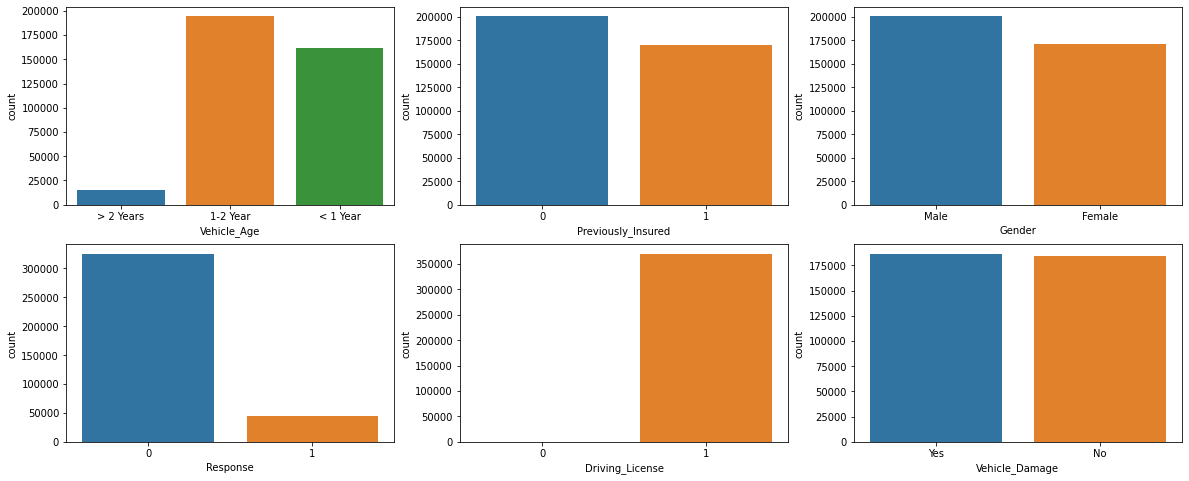

In [17]:
# Counting the values in categorical features
bar=1
plt.figure(figsize=(20,8))

for col in categorical_columns:
  plt.subplot(2, 3, bar)
  sns.countplot(dataset[col])
  bar+=1

The dependent variable shows that the data is highly imbalanced. Vehicles more than 2 years of age are less in numbers as compared to other two classes.  Also, the people without driving license are negligible.

### What all manipulations have you done and insights you found?

The 'id' column did not convey any information so we removed it first. The 'Annual_Primium' variable was highly skwed so we treated the outliers to get it normalized. 'Response' showed imbalanced class. '1' response value is approximately 7 times lower than the '0' value and it'll be handled later.


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

Text(0.5, 1.0, 'The two Types of responses')

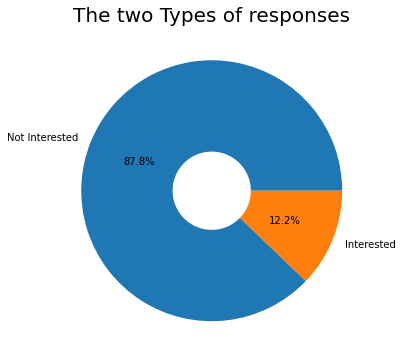

In [18]:
# Chart - 1 visualization code: Pie chart for response variable 'Response'
plt.figure(figsize=(6,6))
plt.pie(dataset["Response"].value_counts(),labels=('Not Interested','Interested'),autopct='%1.1f%%',radius=1)
plt.pie([1],colors=['w'],radius=0.3)
plt.title("The two Types of responses",fontsize=20)

##### 1. Why did you pick the specific chart?

The response variable in the study has categorical records and a pie chart represents the categorical data in a circular form with the slices proportional to the sizes of the categories.

##### 2. What is/are the insight(s) found from the chart?

The Pie chart indicates class imbalance. Only 12.2 % of the response values belong to category '1', i.e. interesred class this is approximately 7 times lower than the '0' values.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Only 12.2% of the health insurance holders are interested in vehicle insurance.

#### Chart - 2

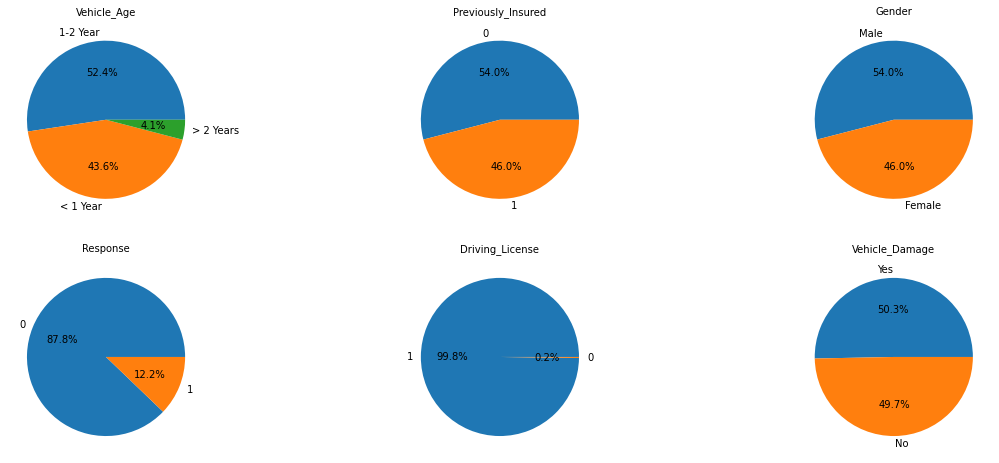

In [19]:
# Chart - 2 visualization code: Distribution of categorical features via pie chart

plt.figure(figsize=(20,8))
pie=1
for col in categorical_columns:
  plt.subplot(2, 3, pie)
  plt.pie(dataset[col].value_counts(),labels=dataset[col].value_counts().index,autopct='%1.1f%%')
  plt.title(col,fontsize=10)
  pie+=1

##### 1. Why did you pick the specific chart?

A pie chart shows how a total amount is divided between levels of a categorical variable as a circle divided into radial slices.

##### 2. What is/are the insight(s) found from the chart?

Only 4.1% of the vehicles are of age more than 2 years. Most (99.8%) of the customers have driving license. And the 'Response' classes are imbalanced.

#### Chart - 3

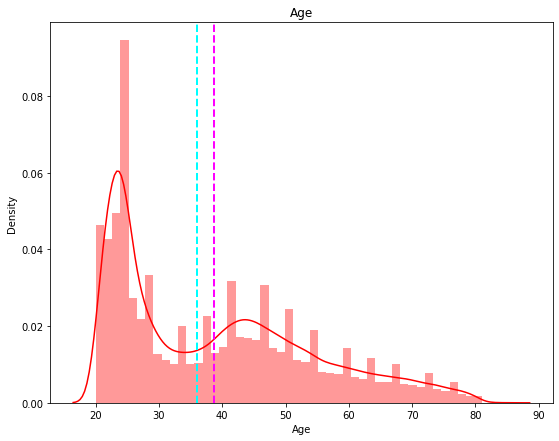

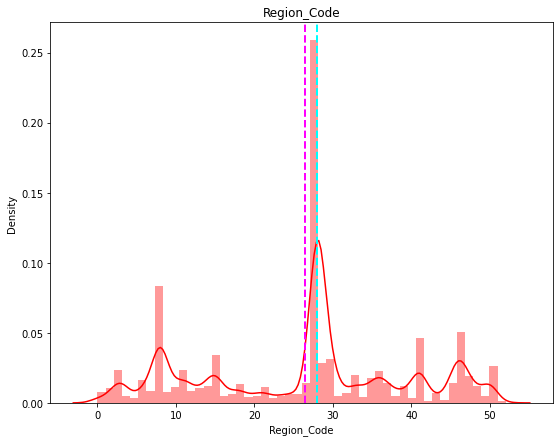

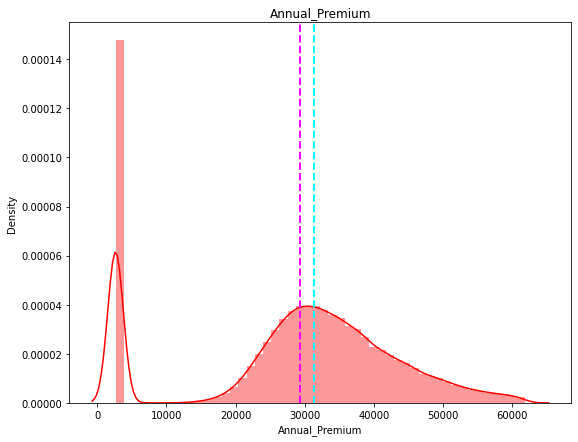

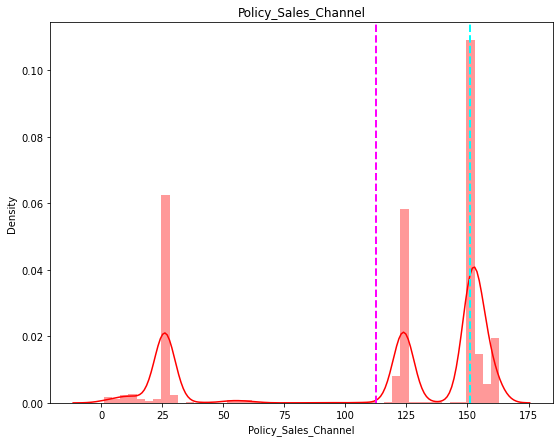

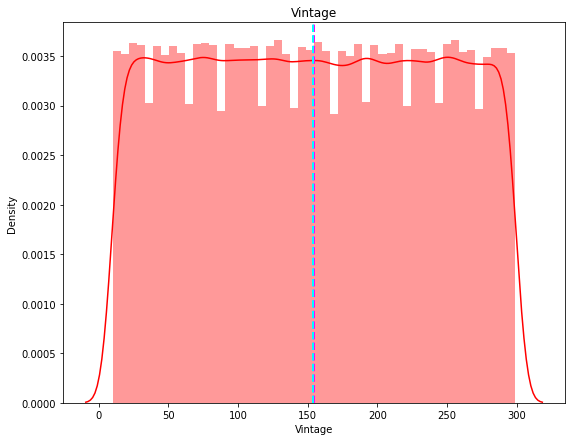

In [20]:
# Chart - 3 visualization code
# Understanding the distribution of numerical columns
for col in num_columns:
  fig=plt.figure(figsize=(9,7))
  ax=fig.gca()
  sns.distplot(dataset[col],color='r')
  ax.axvline(dataset[col].mean(), color='magenta', linestyle='dashed', linewidth=2)
  ax.axvline(dataset[col].median(), color='cyan', linestyle='dashed', linewidth=2)    
  ax.set_title(col)

##### 1. Why did you pick the specific chart?

A distribution plot helps in understanding how the values of numerical data are distributed, its dispersion and skewness.

##### 2. What is/are the insight(s) found from the chart?

The distributions of numerical features are not normal. The 'Vintage' column has uniform distribution. Data in other columns have no regular distribution.

#### Chart - 4

In [21]:
# Code to define a funtion to plot the pattern of responses corresponding to categorical columns
def response_count(col):
  ''' The function plots the Response classes
   for different classes in categorical variables'''
  plt.figure(figsize=(7,7))
  sns.countplot(data=dataset, x='Response',hue=col)
  plt.title(f"{col}-wise responses",fontsize=20)
  plt.xlabel('Responses',fontsize=20)
  plt.ylabel('Response Count',fontsize=20)
  plt.grid(True)


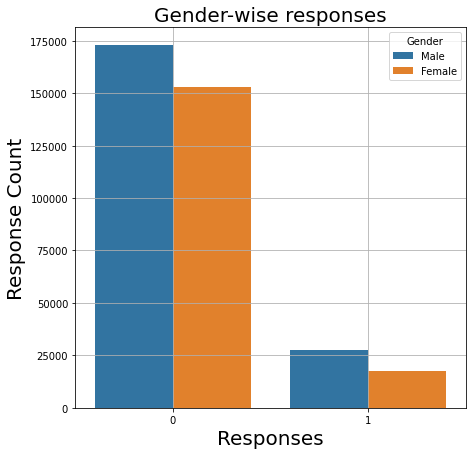

In [22]:
# Chart - 4 visualization code: 'Gender' wise Response
response_count('Gender')

##### 1. Why did you pick the specific chart?

Count plot counts the category values and plots them as columns. It, in our case, also helps in understanding category counts with respect to categories of other categorical variables.

##### 2. What is/are the insight(s) found from the chart?

Female records are less than the male records in both the responses.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Number of males exceeds the number of females in both the responses. This, simply, means that males outnumber the females in the data and it dosen't affect the responses.

#### Chart - 5

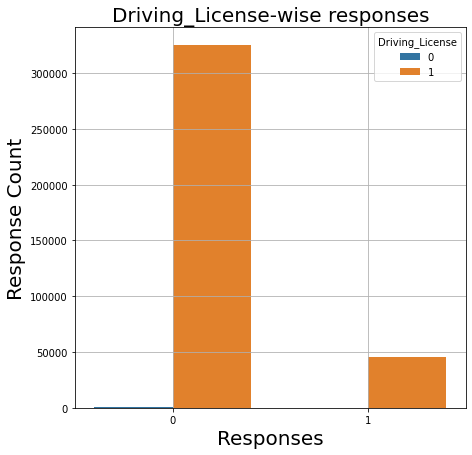

In [23]:
# Chart - 5 visualization code: 'Driving_License' wise Responses
response_count('Driving_License')

##### 1. Why did you pick the specific chart?

Count plot counts the category values and plots them as columns. It, in our case, also helps in understanding category counts with respect to categories of other categorical variables.



##### 2. What is/are the insight(s) found from the chart?

Due to negligible '0' class in 'Driving_License' both the responses are seen only in '1' class of 'Driving_License'.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Most of the values in 'Driving_License' are 1 so, effectively, information in 'Driving_License' column is not important for response variable.

#### Chart - 6

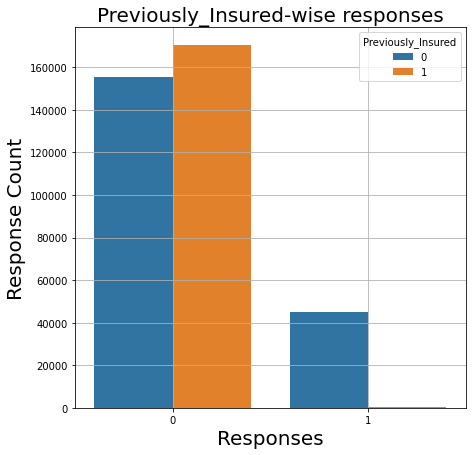

In [24]:
# Chart - 6 visualization code: 'Previously_Insured' wise Response
response_count('Previously_Insured')

##### 1. Why did you pick the specific chart?

Count plot counts the category values and plots them as columns. It also helps in understanding category counts with respect to categories of other categorical variables.



##### 2. What is/are the insight(s) found from the chart?

The response of previously not insured class is overwhelmingly positive.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

As can be expected, previously insured customers are not interested in vehicle insurance and previously not insured customers are opting for the policy. So, focusing on the 'not insured' customers may improve the growth.

#### Chart - 7

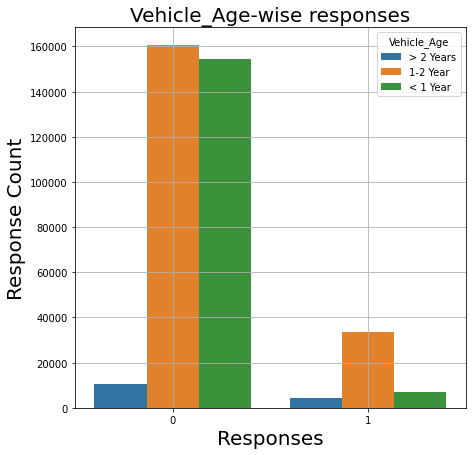

In [25]:
# Chart - 7 visualization code: 'Vehicle_Age' wise responses
response_count('Vehicle_Age')

Vehicles with age 1-2 years have the highest positive response. Age of more than 2 years is the smallest class so its positive response can be considered high.

##### 1. Why did you pick the specific chart?

Count plot counts the category values and plots them as columns. It also helps in understanding category counts with respect to categories of other categorical variables.



##### 2. What is/are the insight(s) found from the chart?

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The customers with old vehicles are more likely to be interested in the policy

#### Chart - 8

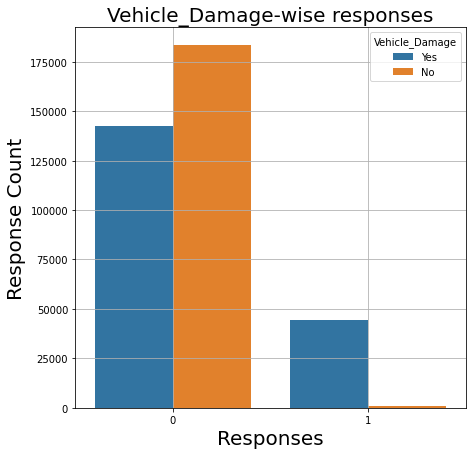

In [26]:
# Chart - 8 visualization code : 'Vehicle_Damage' wise response
response_count('Vehicle_Damage')

##### 1. Why did you pick the specific chart?

Count plot counts the category values and plots them as columns. It, in our case, also helps in understanding category counts with respect to categories of other categorical variables.



##### 2. What is/are the insight(s) found from the chart?

Customers with damaged vehicles are more likely to opt for the insurance policy.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The class of damaged vehicles is potential customer of the company.

#### Chart - 9

In [27]:
# Code to define a funtion to plot the pattern of responses corresponding to numerical columns
def response_for_features(col):
  ''' The function plots the Response classes
   for different classes in categorical variables'''
  plt.figure(figsize=(8,8))
  plt.subplot(2,1,1)
  sns.kdeplot(data=dataset, x=col,hue='Response')
  plt.title(f"{col}-wise responses",fontsize=20)
  plt.xlabel('Responses',fontsize=20)
  plt.ylabel(f"{col}Count",fontsize=20)
  plt.grid(True)
  plt.subplot(2,1,1)
  dataset.boxplot(column=col,by='Response',figsize=(5,5))


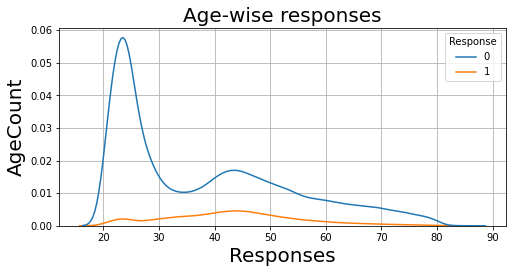

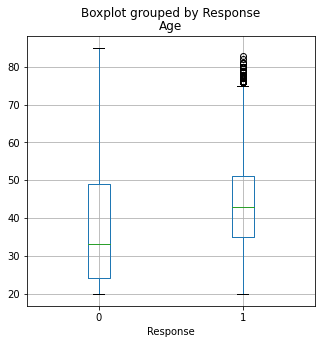

In [28]:
# Chart - 9 visualization code : Age-wise response
response_for_features('Age')

##### 1. Why did you pick the specific chart?

Kernel Density Estimation (KDE) is a way to estimate the probability density function of a continuous random variable. And a box plot is a plot of the distribution of a continuous variable based on the quartiles of the variable.

##### 2. What is/are the insight(s) found from the chart?

Younger population has higher frequency but it showes less interest in the insurance policy.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Middle-aged and even elder people are showing more interest in the vehicle insurance policy so the company should design its policies accordingly.

#### Chart - 10

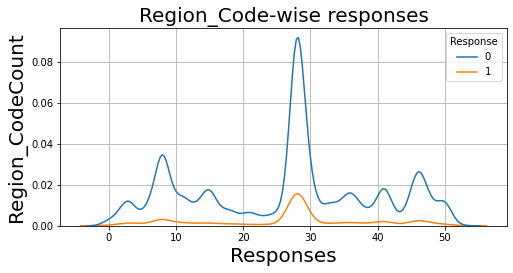

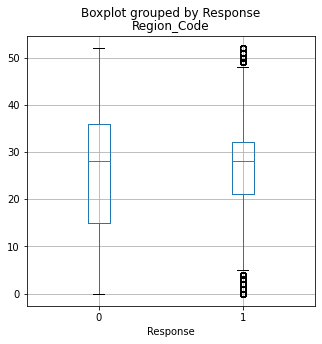

In [29]:
# Chart - 10 visualization code
response_for_features('Region_Code')

##### 1. Why did you pick the specific chart?

Kernel Density Estimation (KDE) is a way to estimate the probability density function of a continuous random variable. And a box plot is a plot of the distribution of a continuous variable based on the quartiles of the variable.

##### 2. What is/are the insight(s) found from the chart?

Both the responses are somewhat uniformally distributed over the regions. For the positive responses the spread is more with almost no peak that's why these outliers are popping up.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The region code is not affecting the responses much.

#### Chart - 11

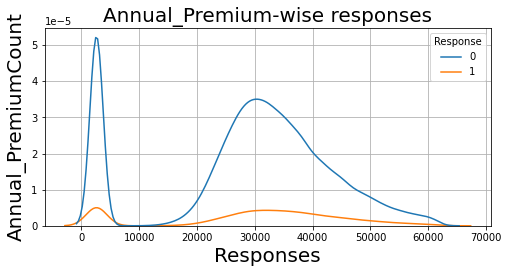

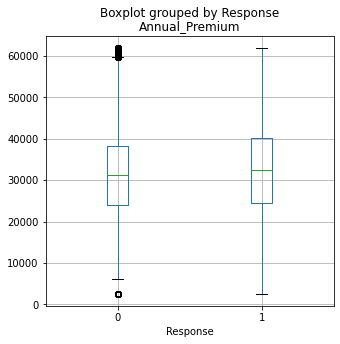

In [30]:
# Chart - 11 visualization code
response_for_features('Annual_Premium')

##### 1. Why did you pick the specific chart?

Kernel Density Estimation (KDE) is a way to estimate the probability density function of a continuous random variable. And a box plot is a plot of the distribution of a continuous variable based on the quartiles of the variable.

##### 2. What is/are the insight(s) found from the chart?

Both the responses are uniformally distributed over the range of Annual premium. For high frequency (or density) point in Annual premium the frequencies of the responses are also high.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The Annual_Premium does not make any impact on the responses.

#### Chart - 12

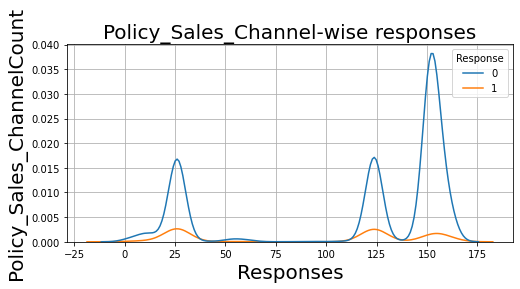

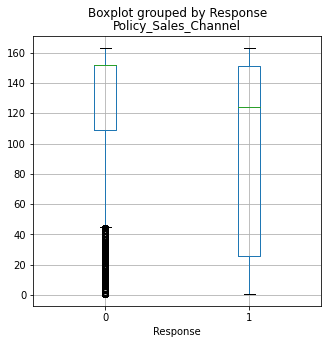

In [31]:
# Chart - 12 visualization code
response_for_features('Policy_Sales_Channel')

##### 1. Why did you pick the specific chart?

Kernel Density Estimation (KDE) is a way to estimate the probability density function of a continuous random variable. And a box plot is a plot of the distribution of a continuous variable based on the quartiles of the variable.

##### 2. What is/are the insight(s) found from the chart?

The responses are uniformally distributed over the policy sales channels.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights do not help creating a positive business impact.

#### Chart - 13

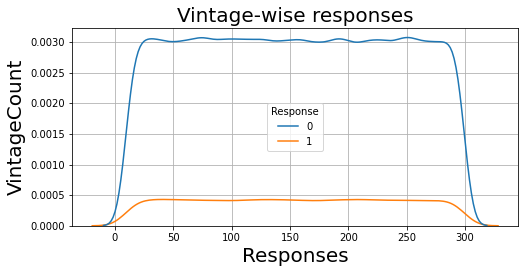

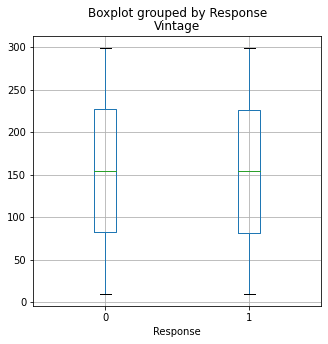

In [34]:
# Chart - 13 visualization code
response_for_features('Vintage')

##### 1. Why did you pick the specific chart?

Kernel Density Estimation (KDE) is a way to estimate the probability density function of a continuous random variable. And a box plot is a plot of the distribution of a continuous variable based on the quartiles of the variable.

##### 2. What is/are the insight(s) found from the chart?

Responses are uniformally distributed over vintage range.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights do not help creating a positive business impact.

#### Chart - 14 - Correlation Heatmap

<AxesSubplot:>

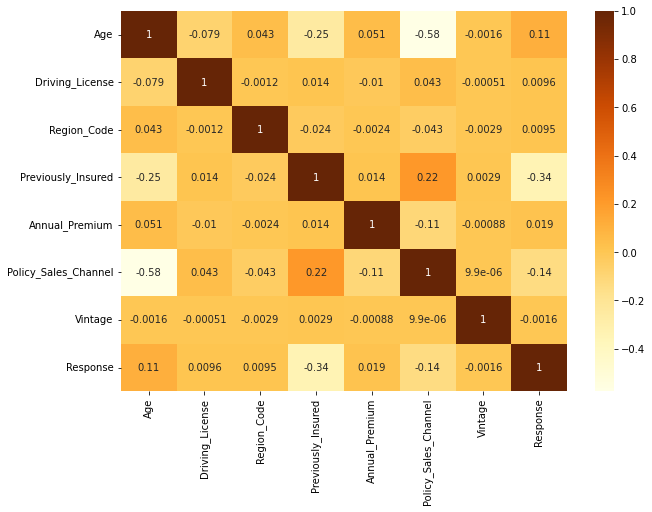

In [35]:
# Correlation Heatmap visualization code

plt.figure(figsize=(10,7))
correlation = dataset.corr()
sns.heatmap(correlation, annot=True, cmap='YlOrBr')

##### 1. Why did you pick the specific chart?

A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. The range of correlation is [-1,1].

Thus to know the correlation between all the variables along with the correlation coeficients, i used correlation heatmap.

##### 2. What is/are the insight(s) found from the chart?

The correlation matrix showes no strong correlation among the variables. The dependent variable 'Response' also exhibits poor correlation with independent features.

#### Chart - 15 - Pair Plot 

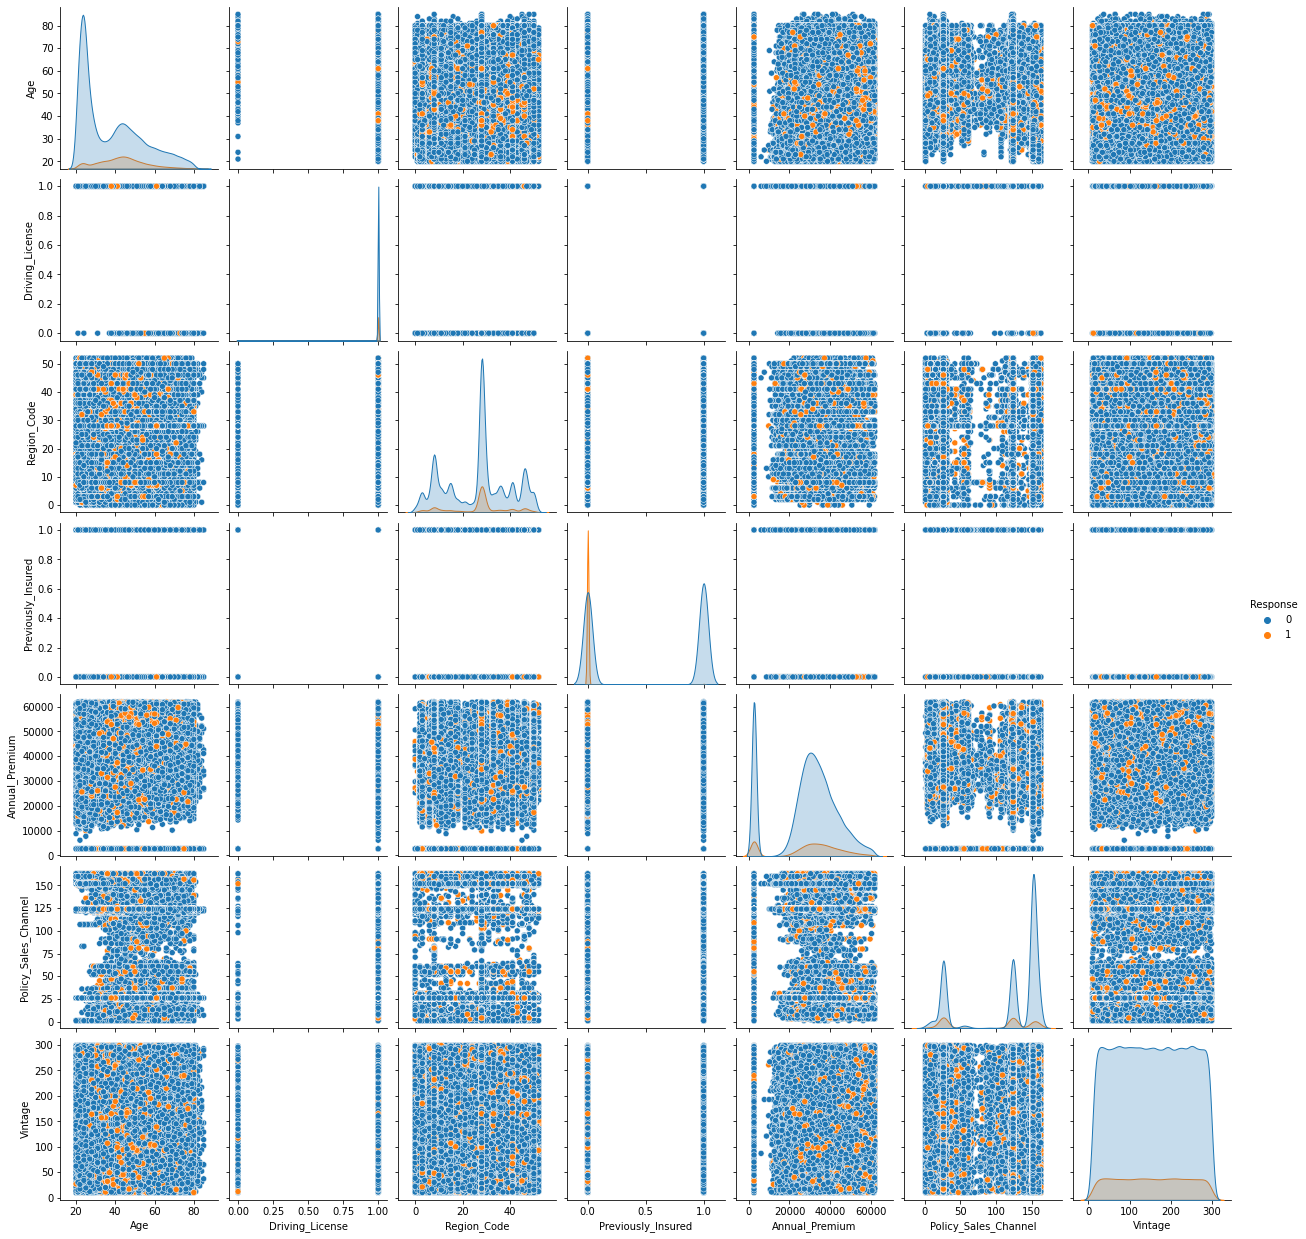

In [ ]:
# Pair plot visualization code
sns.pairplot(dataset, hue="Response")

##### 1. Why did you pick the specific chart?

Pair plot is used to understand the best set of features to explain a relationship between two variables or to form the most separated clusters. It also helps to form some simple classification models by drawing some simple lines or make linear separation in our data-set.

Thus, I used pair plot to analyse the patterns of data and realationship between the features.

##### 2. What is/are the insight(s) found from the chart?

The pair plots suggest that the classes are highly mixed and hard to separate linearly. Only Previously_Insured feature separates the classes well.

## ***5. Feature Engineering & Data Pre-processing***

In [36]:
# Create a copy of dataset
df=dataset.copy()

### 1. Handling Missing Values

In [37]:
# Handling Missing Values & Missing Value Imputation

#There is no Missing Values in this dataset.

### 2. Handling Outliers

In [38]:
# Handling Outliers & Outlier treatments

#already handled


### 3. Categorical Encoding

In [39]:
# The values in categorical columns are
for i in categorical_columns:
  print(i,df[i].unique())

Vehicle_Age ['> 2 Years' '1-2 Year' '< 1 Year']
Previously_Insured [0 1]
Gender ['Male' 'Female']
Response [1 0]
Driving_License [1 0]
Vehicle_Damage ['Yes' 'No']


In [40]:
# Getting dictionaries for Label Encoding
dict1={'> 2 Years':2, '1-2 Year':1, '< 1 Year':0}
dict2={"Yes":1,"No":0}
dict3={'Male':1,'Female':0}

In [41]:
# Encode your categorical columns
# Label encoding
df['Vehicle_Age']=df['Vehicle_Age'].map(dict1)
df['Vehicle_Damage']=df['Vehicle_Damage'].map(dict2)
df['Gender']=df['Gender'].map(dict3)

#### What all categorical encoding techniques have you used & why did you use those techniques?

 There are only 3 categorical columns that are to be encoded. I have used label encoding as there are only 2-3 unique values in each column.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [42]:
df.columns

Index(['Gender', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [43]:
# Manipulate Features to minimize feature correlation and create new features
''' I have already dropped the 'id' column and the correlations among features are not very high.
So I can skip manipulating features. ''' 

" I have already dropped the 'id' column and the correlations among features are not very high.\nSo I can skip manipulating features. "

#### 2. Feature Selection

In [44]:
# Select your features wisely to avoid overfitting
''' The 'Driving_License' column is quasi constant but I am not going to drop it.
The dataset does not have a lot of features so I am using all the features in the modeling. '''

" The 'Driving_License' column is quasi constant but I am not going to drop it.\nThe dataset does not have a lot of features so I am using all the features in the modeling. "

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [45]:
# Transform Your data
''' Logistic Regression and tree based algorithms do not assume normality 
so I'm not considering to transform the data.'''

# creating the set of dependent and independent variables
X = df.drop(labels='Response', axis=1)
Y = df['Response']

# print the shape of X and Y
print(f"The shape of X is {X.shape}")
print(f"The shape of Y is {Y.shape}")

The shape of X is (370789, 10)
The shape of Y is (370789,)


### 6. Data Scaling

In [46]:
# Scaling the data using MinMax Scaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [47]:
X_scaled

array([[1.        , 0.36923077, 1.        , ..., 0.63825048, 0.15432099,
        0.71626298],
       [1.        , 0.86153846, 1.        , ..., 0.52151463, 0.15432099,
        0.59861592],
       [1.        , 0.41538462, 1.        , ..., 0.60180217, 0.15432099,
        0.05882353],
       ...,
       [1.        , 0.01538462, 1.        , ..., 0.54820965, 0.98148148,
        0.52249135],
       [0.        , 0.73846154, 1.        , ..., 0.70849786, 0.75925926,
        0.22145329],
       [1.        , 0.4       , 1.        , ..., 0.66057507, 0.15432099,
        0.78546713]])

##### Which method have you used to scale you data and why?

The distribution of features is not normal. So I am using MinMaxScaler to get the independent features normalized.

### 7. Data Splitting

In [48]:
# Split your data to train and test. Choose Splitting ratio wisely.

X_train, X_test, Y_train, Y_test = train_test_split( X , Y , test_size = 0.2, random_state =0)

In [49]:
# Getting the shape of Train Test set.
print("X_train shape ", X_train.shape)
print("Y_train shape ", Y_train.shape)
print("X_test shape ",X_test.shape)
print("Y_test shape ",Y_test.shape)

X_train shape  (296631, 10)
Y_train shape  (296631,)
X_test shape  (74158, 10)
Y_test shape  (74158,)


##### What data splitting ratio have you used and why? 

Here, I have used 80:20 split for train and test set. The given dataset has over 3 Lacs instances, so choosing split ratio is not that hard.

### 8. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

 The EDA suggested that only 12.2 % of the response values belong to category '1', i.e. interesred class this is approximately 7 times lower than the '0' values. This made the dataset imbalanced.

In [50]:
# Handling Imbalanced Dataset (If needed)
# Handaling imbalance dataset using SMOTE
sm = SMOTE(random_state=42)
X_train, Y_train = sm.fit_resample(X_train, Y_train)

# describes info about train and test set
print("Shape of X_train dataset: ", X_train.shape)
print("Shape of y_train dataset: ", Y_train.shape)
print("Shape of X_test dataset: ", X_test.shape)
print("Shape of y_test dataset: ", Y_test.shape)

Shape of X_train dataset:  (521020, 10)
Shape of y_train dataset:  (521020,)
Shape of X_test dataset:  (74158, 10)
Shape of y_test dataset:  (74158,)


##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

I have used SMOTE oversampling to balance the dataset. This technique generates synthetic data for the minority class.

SMOTE (Synthetic Minority Oversampling Technique) works by randomly picking a point from the minority class and computing the k-nearest neighbors for this point. The synthetic points are added between the chosen point and its neighbors.

## ***6. ML Model Implementation***

### ML Model - 1 - **Implementing Logistic Regression**

In [51]:
# ML Model - 1 Implementation

# Define a function for logistic regression
def logistic_regression(X_train, X_test, Y_train, Y_test):

  '''
  The function takes train and test sets as arguments and fits the Logistic Regression model,
  makes predictions and calculates evaluation metrics.
  
  '''
  # Fit the Algorithm
  log_reg = LogisticRegression(fit_intercept=True, max_iter=1000)
  log_reg.fit(X_train, Y_train)

  # Predict on the model
  # get the predicted probabilities
  logistic_train_prob = log_reg.predict_proba(X_train)
  logistic_test_prob = log_reg.predict_proba(X_test)

  # get the predicted classes
  logistic_train_class = log_reg.predict(X_train)
  logistic_test_class = log_reg.predict(X_test)

  # calculating accuracy on train and test set
  logistic_train_acc = accuracy_score(Y_train, logistic_train_class)
  logistic_test_acc = accuracy_score(Y_test, logistic_test_class)

  print("\n")
  print("The accuracy on training data is", logistic_train_acc)
  print("The accuracy on testing data is", logistic_test_acc)
  print("\n")

  # calculating precision and recall on the test set
  log_precision = precision_score(Y_test, logistic_test_class, average='weighted')
  print("The precision on testing data is", log_precision)

  log_recall = recall_score(Y_test, logistic_test_class, average='weighted')
  print("The recall on testing data is", log_recall)

  # testing confusion matrix
  print("\n")
  print("Confusion matrix for test set:")
  cm = confusion_matrix(Y_test, logistic_test_class)
  print(cm)
  # Classification report
  print("\n Classification report:")
  print(classification_report(Y_test, logistic_test_class))
  print("\n")

  # prediction in a dataframe
  pred = pd.DataFrame({'Actual Label': Y_test,
                       'Predicted Label': logistic_test_class})
  print("The top 10 rows of actual vs predicted labels\n", pred.head(10))

  return logistic_test_acc, log_precision, log_recall

In [52]:
# Runnig the model
lr=logistic_regression(X_train, X_test, Y_train, Y_test)



The accuracy on training data is 0.7764711527388584
The accuracy on testing data is 0.6449742441813425


The precision on testing data is 0.9018862157269878
The recall on testing data is 0.6449742441813425


Confusion matrix for test set:
[[39105 26019]
 [  309  8725]]

 Classification report:
              precision    recall  f1-score   support

           0       0.99      0.60      0.75     65124
           1       0.25      0.97      0.40      9034

    accuracy                           0.64     74158
   macro avg       0.62      0.78      0.57     74158
weighted avg       0.90      0.64      0.71     74158



The top 10 rows of actual vs predicted labels
         Actual Label  Predicted Label
118593             0                0
15921              0                0
346190             1                1
71304              0                1
81108              0                0
224898             0                1
324703             0                0
92953              1   

In [53]:
# store the metrics of logistic regression
log_acc = lr[0]
log_precision = lr[1]
log_recall = lr[2]

### ML Model - 2 - **Implementing Random Forest Classifier**

In [54]:
# function for implementing  Random Forest
def random_forest(X_train, X_test, Y_train, Y_test):
  '''
  The function takes train and test sets as arguments and fits the Random Forest model,
  makes predictions, calculates evaluation metrics and feature importance as well.
  
  '''

  # Create a dictionary for hyperparameters
  param_dict = {'n_estimators': [int(x) for x in np.linspace(100,300,3)],
              'max_depth': [int(x) for x in np.linspace(5,10,3)],
              'min_samples_split': [int(x) for x in np.linspace(10,50,3)],
              'min_samples_leaf': [int(x) for x in np.linspace(20,50,3)]}

  # build a random forest model
  rf_model = RandomForestClassifier()
  # random search
  rf_grid = RandomizedSearchCV(estimator=rf_model,
                       param_distributions= param_dict,
                       cv = 4, verbose=2, scoring='accuracy')

  rf_grid.fit(X_train,Y_train)

  print(rf_grid.best_estimator_)
  rf_optimal_model = rf_grid.best_estimator_
  print(rf_grid.best_params_)

  # get the predicted probabilities
  rf_train_prob = rf_optimal_model.predict_proba(X_train)
  rf_test_prob = rf_optimal_model.predict_proba(X_test)

  # get the predicted classes
  rf_train_class = rf_optimal_model.predict(X_train)
  rf_test_class = rf_optimal_model.predict(X_test)

  # calculating accuracy on train and test set
  rf_train_acc = accuracy_score(Y_train, rf_train_class)
  rf_test_acc = accuracy_score(Y_test, rf_test_class)

  print("\n")
  print("The accuracy on train dataset is", rf_train_acc)
  print("The accuracy on test dataset is", rf_test_acc)
  print("\n")

  # calculating precision and recall on the test set
  rf_precision = precision_score(Y_test, rf_test_class, average='weighted')
  print("The precision on test dataset is", rf_precision)

  rf_recall = recall_score(Y_test, rf_test_class, average='weighted')
  print("The recall on test dataset is", rf_recall)


  # testing confusion matrix
  print("\n Confusion matrix for test set:")
  cm = confusion_matrix(Y_test, rf_test_class)
  print(cm)

  print("\n Classification report:")
  print(classification_report(Y_test, rf_test_class))
  print("\n")

  # prediction in a dataframe
  pred = pd.DataFrame({'Actual Label': Y_test,
                       'Predicted Label': rf_test_class})
  print("The top 5 rows of actual vs predicted labels\n", pred.head())

  # calculate the feature importances
  features = X_train.columns
  importances = rf_optimal_model.feature_importances_
  indices = np.argsort(importances)

  importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}

  importance_df = pd.DataFrame(importance_dict)

  plt.figure(figsize=(8,8))
  plt.title('Feature Importance')
  plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
  plt.yticks(range(len(indices)), [features[i] for i in indices])
  plt.xlabel('Relative Importance')
  plt.show()

  importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)
  pd.set_option('display.max_columns', 200)
  pd.set_option('display.max_rows', 200)
  print(importance_df.sort_values(by=['Feature Importance'],ascending=False))

  return rf_test_acc, rf_precision, rf_recall, rf_test_prob

Fitting 4 folds for each of 10 candidates, totalling 40 fits
[CV] END max_depth=5, min_samples_leaf=35, min_samples_split=10, n_estimators=200; total time= 1.4min
[CV] END max_depth=5, min_samples_leaf=35, min_samples_split=10, n_estimators=200; total time= 1.1min
[CV] END max_depth=5, min_samples_leaf=35, min_samples_split=10, n_estimators=200; total time= 1.1min
[CV] END max_depth=5, min_samples_leaf=35, min_samples_split=10, n_estimators=200; total time= 1.2min
[CV] END max_depth=10, min_samples_leaf=50, min_samples_split=30, n_estimators=200; total time= 1.7min
[CV] END max_depth=10, min_samples_leaf=50, min_samples_split=30, n_estimators=200; total time= 1.7min
[CV] END max_depth=10, min_samples_leaf=50, min_samples_split=30, n_estimators=200; total time= 1.7min
[CV] END max_depth=10, min_samples_leaf=50, min_samples_split=30, n_estimators=200; total time= 1.7min
[CV] END max_depth=10, min_samples_leaf=35, min_samples_split=30, n_estimators=200; total time= 1.6min
[CV] END max_dep

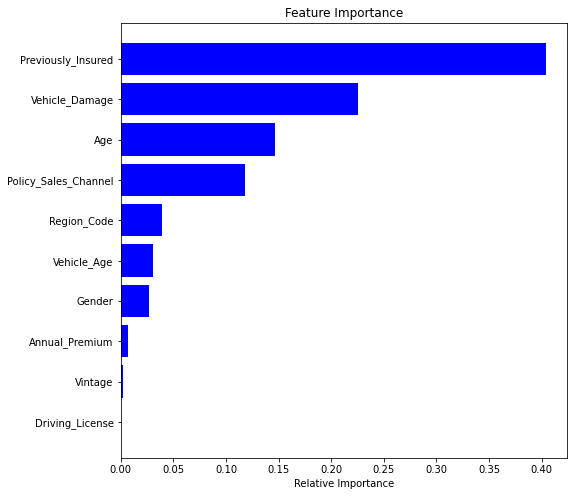

                Feature  Feature Importance
4    Previously_Insured                0.40
6        Vehicle_Damage                0.23
1                   Age                0.15
8  Policy_Sales_Channel                0.12
3           Region_Code                0.04
0                Gender                0.03
5           Vehicle_Age                0.03
7        Annual_Premium                0.01
2       Driving_License                0.00
9               Vintage                0.00


In [55]:
#Running the Model
rf = random_forest(X_train, X_test, Y_train, Y_test)

In [56]:
# store the metrics of random forest
rf_acc = rf[0]
rf_precision = rf[1]
rf_recall = rf[2]

### ML Model - 3 - **Implementing AdaBoost Classifier**

In [57]:
# function for Adaboost
def ada_boost(X_train, X_test, Y_train, Y_test):
  '''
  The function takes train and test sets as arguments and fits the Random Forest model,
  makes predictions, calculates evaluation metrics and feature importance as well.
  '''
  # hyperparameters dictionary
  parameters = {
    'n_estimators': [50,100,150,200],
    'learning_rate': [0.01,0.1,1]}
  abc=AdaBoostClassifier()
  clf = RandomizedSearchCV(abc, parameters, cv=4, n_jobs=-1)

  # Fitting the model
  clf.fit(X_train,Y_train)

  # Getting the optimal one
  print(clf.best_estimator_)
  adb_optimal_model = clf.best_estimator_
  print(clf.best_params_)
  print("\n")

  # get the predicted probabilities
  adb_train_prob = adb_optimal_model.predict_proba(X_train)
  adb_test_prob = adb_optimal_model.predict_proba(X_test)

  # get the predicted classes
  adb_train_class = adb_optimal_model.predict(X_train)
  adb_test_class = adb_optimal_model.predict(X_test)

  # calculating accuracy on train and test set
  adb_train_acc = accuracy_score(Y_train, adb_train_class)
  adb_test_acc = accuracy_score(Y_test, adb_test_class)

  print("The accuracy on train set is", adb_train_acc)
  print("The accuracy on test set is", adb_test_acc)
  print("\n")

  # calculating precision and recall on the test set
  adb_precision = precision_score(Y_test, adb_test_class, average='weighted')
  print("The precision on test dataset is", adb_precision)

  adb_recall = recall_score(Y_test, adb_test_class, average='weighted')
  print("The recall on test dataset is", adb_recall)

  # testing confusion matrix
  print("\n Confusion matrix for test set:")
  cm = confusion_matrix(Y_test, adb_test_class)
  print(cm)

  print("\n Classification report:")
  print(classification_report(Y_test, adb_test_class))
  print("\n")

  # prediction in a dataframe
  pred = pd.DataFrame({'Actual Label': Y_test,
                       'Predicted Label': adb_test_class})
  print("The top 5 rows of actual vs predicted labels\n", pred.head(10))

  # calculate the feature importances
  features = X_train.columns
  importances = adb_optimal_model.feature_importances_
  indices = np.argsort(importances)

  importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}

  importance_df = pd.DataFrame(importance_dict)

  plt.figure(figsize=(8,8))
  plt.title('Feature Importance')
  plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
  plt.yticks(range(len(indices)), [features[i] for i in indices])
  plt.xlabel('Relative Importance')
  plt.show()

  importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)
  pd.set_option('display.max_columns', 200)
  pd.set_option('display.max_rows', 200)
  print(importance_df.sort_values(by=['Feature Importance'],ascending=False))

  return adb_test_acc, adb_precision, adb_recall

AdaBoostClassifier(learning_rate=1, n_estimators=150)
{'n_estimators': 150, 'learning_rate': 1}


The accuracy on train set is 0.8409657978580477
The accuracy on test set is 0.7566412254915181


The precision on test dataset is 0.8729977747327868
The recall on test dataset is 0.7566412254915181

 Confusion matrix for test set:
[[49524 15600]
 [ 2447  6587]]

 Classification report:
              precision    recall  f1-score   support

           0       0.95      0.76      0.85     65124
           1       0.30      0.73      0.42      9034

    accuracy                           0.76     74158
   macro avg       0.62      0.74      0.63     74158
weighted avg       0.87      0.76      0.79     74158



The top 5 rows of actual vs predicted labels
         Actual Label  Predicted Label
118593             0                0
15921              0                0
346190             1                0
71304              0                0
81108              0                0
224898      

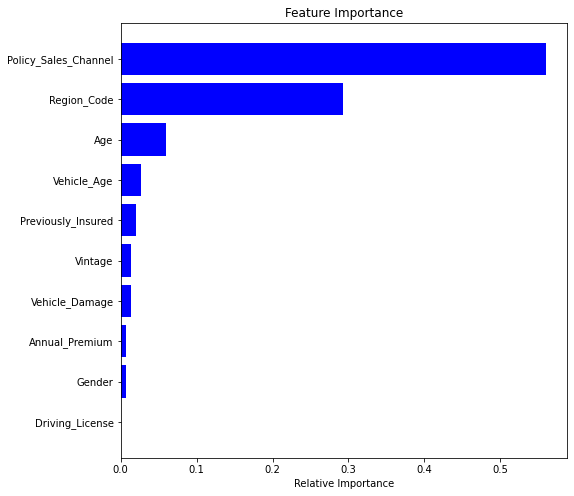

                Feature  Feature Importance
8  Policy_Sales_Channel                0.56
3           Region_Code                0.29
1                   Age                0.06
5           Vehicle_Age                0.03
4    Previously_Insured                0.02
0                Gender                0.01
6        Vehicle_Damage                0.01
7        Annual_Premium                0.01
9               Vintage                0.01
2       Driving_License                0.00


In [58]:
# Running the model
adboost=ada_boost(X_train, X_test, Y_train, Y_test)

In [59]:
# store the metrics of xgboost
adb_acc = adboost[0]
adb_precision = adboost[1]
adb_recall = adboost[2]